#Homework 2

The following code show which packages are used and which cvs files have been downloaded. The second dataset have been loaded using the "read_csv2" since this file uses semicolons (;) as the separators and commas (,) as deciaml notation. The "show_col_types = FALSE" have been used for a cleaner outlook.

In [73]:
library(readr)
library(dplyr)
library(ggplot2)
library(stringr)
df <- read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/Booli_sold.csv", show_col_types = FALSE) 
df_second <- suppressMessages(read_csv2("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/2018_R_per_kommun.csv"))
df_third <- read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv", show_col_types = FALSE)

In this section, we aim to calculate the price per square meter (ppsqm) for each apartment and display the five most expensive apartments based on this. To do so we first use the "select" function to select only the relevant columns from the file. WE then add the ppsqm to the table by using the "mutate" function. We have used the "filter(!is.na(ppsqm))" to remove any rows where the ppsqm value is missing. Then we arranged the table by a descending order and only print the top five. And the five addresses with the highest ppsqm are "Ekhagsvägen 8", "Ekhagsvägen 8", "Ekhagsvägen 10", "Torphagsvägen 4", "Docentbacken 1B".

In [59]:
specified_df <- df %>% 
  select(livingArea, soldPrice, floor, location.address.streetAddress) %>%  
  mutate(ppsqm = soldPrice / livingArea) %>%  
  filter(!is.na(ppsqm))  

top_five_specified_df <- specified_df %>% 
  arrange(desc(ppsqm)) %>%  
  head(5)  

top_five_specified_df


livingArea,soldPrice,floor,location.address.streetAddress,ppsqm
<dbl>,<dbl>,<dbl>,<chr>,<dbl>
24.0,2500000,3,Ekhagsvägen 8,104166.67
24.0,2450000,3,Ekhagsvägen 8,102083.33
23.0,2300000,1,Ekhagsvägen 10,100000.00
25.0,2210000,0,Torphagsvägen 4,88400.00
26.9,2300000,2,Docentbacken 1B,85501.86


Since we want to know the average ppsqm of the apartments in Ekhagen we have used the "mean" function, which gave use the rounded number 58759.

In [60]:
mean(specified_df$ppsqm)

[1] 58759.38

The following code has been executed to highlight an aspect of the data which I find interesting: the average ppsqm of each grouped floor. In the table, we see that it is the lowest floor (-1) that has the highest price per square meter. We can also see that the lowest price per square meter was for floor 7. I find this information to be quite surprising, since it's often the top floors that go for the highest prices, compared to the bottom floors. This often occurs because top floors have a more desired view, and so on. But in this case, the lowest floor might have a better floor plan or something along those lines, which results in them becoming more desirable to buyers. The top floors might have worse conditions, like outdated interiors.

In [61]:
floor_info_df <- specified_df %>%
  group_by(floor) %>%
  summarise(avg_ppsqm = mean(ppsqm, na.rm = TRUE))
floor_info_df

floor,avg_ppsqm
<dbl>,<dbl>
-1,73469.39
0,63285.87
1,61046.92
2,58593.43
3,66387.27
4,53011.96
5,52014.41
6,57552.25
7,35714.29


In this section, we are interested in calculating the total number of legitimate votes from the municipality of Stockholm. We have used the "filter" fucntion along with the "str_detect" function to only include the rows where the region name contains the word "Stockholm". After that we have summarised the total legitimate votes by summarizing the values in valid votes column. To ignore any missing values (NA) we used the "na.rm = TRUE". And this gave use the total number of legitimate votes to be 1426237.

In [62]:
stockholm_votes <- df_second %>%
  filter(str_detect(LÄNSNAMN, "Stockholm")) %>%
  summarise(total_legitimate_votes = sum(`RÖSTER GILTIGA`, na.rm = TRUE))
stockholm_votes

total_legitimate_votes
<dbl>
1426237


In this section, we aim to find the municipality with the highest percentage of votes for the political party 'S'. Therefore, we have selected the relevant columns, municipality name ("KOMMUNAMN") and the votes for the political party S ("s"). We then arranged them in a descending order and only printed out the top municilpality. We got the top municipality to be "Munkfors" with 52.18%.

In [63]:
s_top_municipality_votes <- df_second %>%
  select(KOMMUNNAMN,S) %>%
  arrange(desc(S)) %>%  
  head(1) 
s_top_municipality_votes

KOMMUNNAMN,S
<chr>,<dbl>
Munkfors,52.18


In this section, we are identifying the top three municipalities with the highest voter turnout percentage. Based on the descending order of the voting participants ("VALDELTAGANDE") we have a table containing only th e top three municiplaity votes. And these are "Lomma", "Habo", and "Vellinge".

In [64]:
top_three_municipality_votes <- df_second %>%
  arrange(desc(`VALDELTAGANDE`)) %>%
  select(KOMMUNNAMN, VALDELTAGANDE) %>%
  head(3) 

top_three_municipality_votes

KOMMUNNAMN,VALDELTAGANDE
<chr>,<dbl>
Lomma,93.86
Habo,93.35
Vellinge,93.13


For this analysis, we visualized the relationship between smoking status and stroke status to explore potential patterns in stroke occurrence among different smoking groups.

The first plot displays the data using "geom_bar(position = "dodge")", which allows us to compare the stroke and non-stroke individuals for each smoking status category side by side. The "fill = as.factor(stroke)" argument fills the bars with different colors, where purple represents individuals without a stroke and red represents those who have had a stroke. The "labs()" function is used to add informative labels, such as "Smoking Status" for the x-axis, "Count" for the y-axis, and "Stroke Status" for the color legend. The "facet_wrap(~stroke)" function separates the plot into two facets based on the stroke status, allowing for a clearer comparison between groups. Finally, the "theme_minimal()" function ensures a clean and simple design, while "theme(axis.text.x = element_text(angle = 45, hjust = 1))" adjusts the x-axis labels to avoid overlap, making the chart more readable.

In this plot, we observe that for both the smokers and non-smokers, the number of individuals without a stroke is noticeably higher than those who have had a stroke. This suggests that smoking may influence stroke risk, but it’s not the only factor contributing to stroke occurrences.

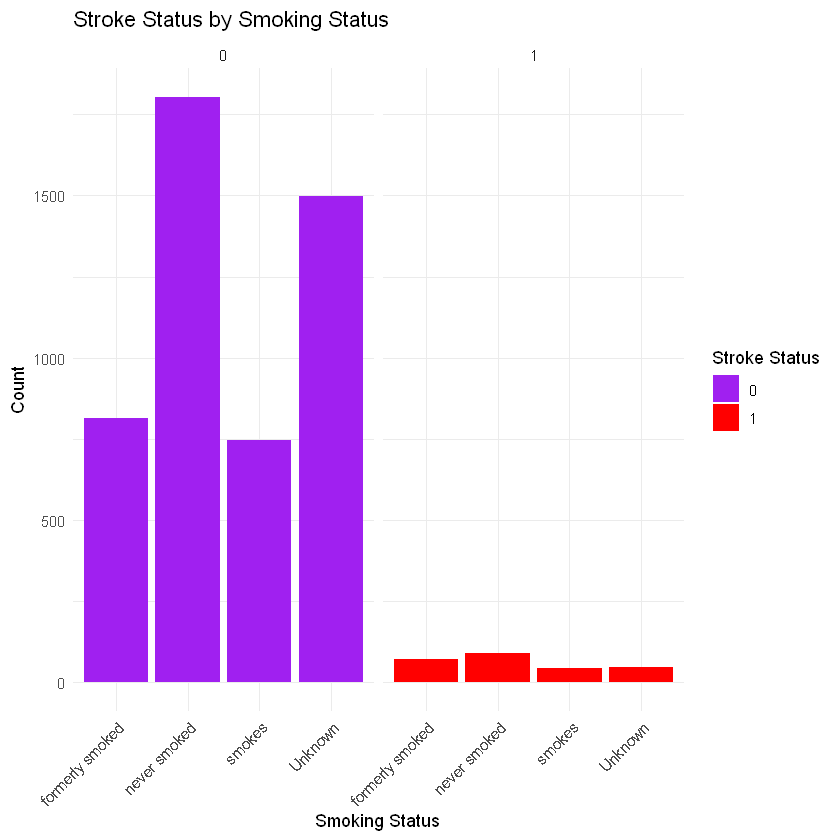

In [70]:
ggplot(df_third, aes(x = smoking_status, fill = as.factor(stroke))) +
  geom_bar(position = "dodge") + 
  scale_fill_manual(values = c("purple", "red")) + 
  labs(title = "Stroke Status by Smoking Status",
       x = "Smoking Status",
       y = "Count",
       fill = "Stroke Status") +
  theme_minimal() +
  facet_wrap(~stroke) + 
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  


The second plot uses geom_bar(position = "fill") to show the proportion of people with and without a stroke within each smoking category. This stacked bar chart allows for a better comparison of stroke prevalence within each group, with the bars scaled to represent percentages rather than raw counts. As in the first plot, the color scale differentiates between stroke and non-stroke individuals.

From this visual representation, we can draw the conclusion that smoking appears to be a contributing factor to stroke risk, though the relationship is not overwhelmingly strong. While the proportion of strokes among smokers is higher compared to non-smokers, the data suggests that stroke occurrences are influenced by a variety of factors beyond smoking alone.

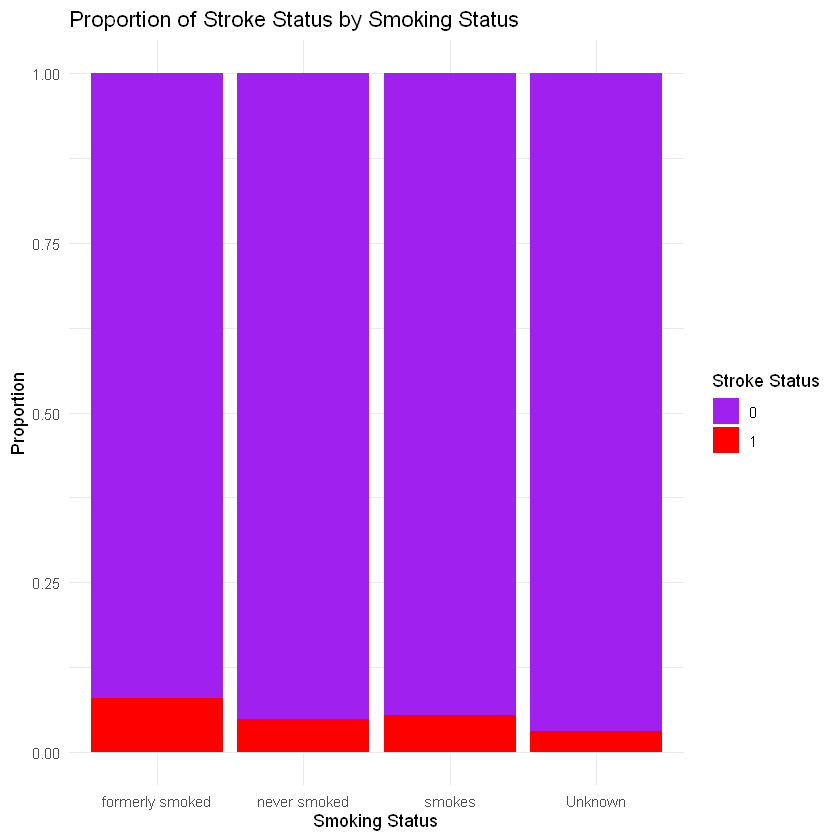

In [69]:
ggplot(df_third, aes(x = smoking_status, fill = as.factor(stroke))) +
  geom_bar(position = "fill") +  
  scale_fill_manual(values = c("purple", "red")) + 
  labs(title = "Proportion of Stroke Status by Smoking Status",
       x = "Smoking Status",
       y = "Proportion",
       fill = "Stroke Status") +
  theme_minimal() 
